In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt

import random
import math
import numpy as np

T = 10
dt = 0.1
N = round(T/dt)
t = np.linspace(0, T, N)
X0 = 50
cash0 = 1000
S0 = 100


# initialize securities number and price for each step
X = [X0] * N
cash = [cash0] * N
S = S0 + np.cos(np.arange(0, T, dt))

# traders list
traders = []

# create traders class
class RandomTrader:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
    
    def random_trade(self):
        return np.random.randint(-2, 3)

    def trade(self, num_steps):
        for i in range(1, num_steps):
            self.X[i] = self.X[i - 1] + self.random_trade()
            
    def show_stock(self):
        return self.X
    
class TrendFollower:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
        self.min_leverage = 2
        self.max_leverage = 8
    
    def trend_following_trade(self, S, current_step):
        if current_step <= 3:
            return 0
        mean = sum(S[current_step - 4:current_step - 1])/3
        if S[current_step - 1] < mean:
            return self.sell(S, current_step)
        elif S[current_step - 1] > mean:
            return self.buy(S, current_step)
        else:
            return 0
        
    def buy(self, S, current_step):
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.floor((self.max_leverage / (self.max_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]
    
    def sell(self, S, current_step):
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.ceil((self.min_leverage / (self.min_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]

    def trade(self, S, current_step):
        self.X[current_step] = self.X[current_step - 1] + self.trend_following_trade(S, current_step)
        self.cash[current_step] = self.cash[current_step - 1] - self.trend_following_trade(S, current_step) * S[current_step - 1]
            
    def show_stock(self):
        return self.X
    
    def show_cash(self):
        return self.cash
    
    def show_value(self, S):
        return [x * s + c for x, s, c in zip(self.X, S, self.cash)]
    
class MeanAversion:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
        
    def mean_aversion_trade(self, S, current_step):
        if current_step <= 3:
            return 0
        mean = sum(S[current_step - 4:current_step - 1])/3
        if S[current_step - 1] > mean:
            return np.random.randint(-2, 0)
        elif S[current_step - 1] < mean:
            return np.random.randint(1, 3)
        else:
            return 0
        
    def trade(self, S, current_step):
        self.X[current_step] = self.X[current_step - 1] + self.mean_aversion_trade(S, current_step)
            
    def show_stock(self):
        return self.X

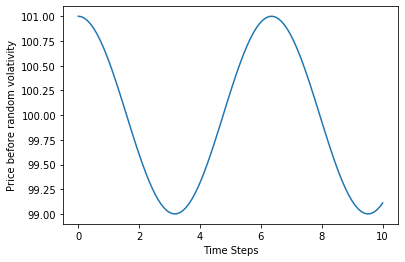

In [2]:
plt.plot(t, S)
plt.xlabel('Time Steps')
plt.ylabel('Price before random volativity')
plt.show()

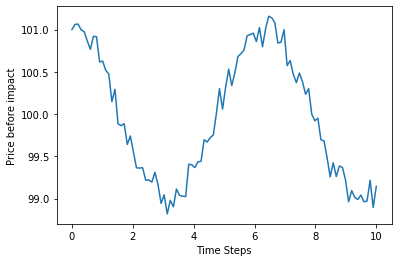

In [3]:
## independent random variable in volativity
xi = np.insert(np.random.normal(0, 1.0, N - 1), 0, 0.0)

## price dynamics
# volativity factors
def volativity_factor(volativity, xi):
    return volativity * xi

volativity = 0.1

S =[S[i] + volativity_factor(volativity, xi[i]) for i in range(N)]

plt.plot(t, S)
plt.xlabel('Time Steps')
plt.ylabel('Price before impact')
plt.show()

In [4]:
## add trader
# traders list
traders[:] = []
traders

for i in range(1):
    traders.append(TrendFollower(X, cash))

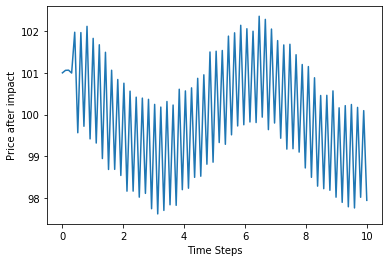

In [5]:
# impact
def permanent_impact(n, gamma):
    return gamma * n

def temporary_impact(n, epsilon, eta):
    return epsilon * np.sign(n) + eta * n

gamma = 0.1
epsilon = 0.1
eta = 0.1

# market price with a random trader and a trend follower
S_temp = S.copy()

n = np.zeros(np.shape(X))
step = 0
for i in range(N):
    step = step + 1
    for trader in traders:
        trader.trade(S_temp, i)
        n[i] += trader.show_stock()[i] - trader.show_stock()[i - 1]
    S_temp[i] = S_temp[i] - permanent_impact(n[i], gamma)
        
plt.plot(t, S_temp)
plt.xlabel('Time Steps')
plt.ylabel('Price after impact')
plt.show()

In [6]:
X = traders[0].show_stock()
cash = traders[0].show_cash()
value = traders[0].show_value(S_temp)

In [7]:
X

[50,
 50,
 50,
 50,
 40.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0,
 41.0,
 53.0]

In [8]:
cash

[1000.0,
 1000.0,
 1000.0,
 1000.0,
 2009.9557701433407,
 684.2994997938083,
 1879.071020566635,
 655.4880513571734,
 1852.122256202747,
 626.7447433240218,
 1819.7444642427429,
 597.825170286887,
 1789.6362286047784,
 569.5589242581884,
 1756.9090186131514,
 538.9945966244195,
 1723.2016316333693,
 510.449191769731,
 1694.688037680823,
 484.59981822961026,
 1667.0859902862135,
 458.0661140398788,
 1636.0323970684358,
 429.30004342628285,
 1607.278531413022,
 402.27722001391885,
 1578.521742066669,
 373.7858425976656,
 1551.1165320024259,
 346.73610669835875,
 1519.6558844235478,
 316.7279541633702,
 1488.152337763888,
 285.9939562352806,
 1458.4269414949645,
 254.67250993123253,
 1428.7251735843033,
 225.9836183244813,
 1399.8787115274106,
 192.5911756577823,
 1370.983402605845,
 164.17911212379045,
 1342.9979660999154,
 135.31325690022072,
 1317.2558069599575,
 106.8288568391356,
 1289.0941187354167,
 77.65958628660542,
 1263.3789174138258,
 45.37526490188884,
 1231.6772572055356,
 1

In [9]:
value

[6050.0,
 6053.0016328934735,
 6053.22548447472,
 6049.778850716703,
 6088.898140449594,
 5961.207049873794,
 6059.64616536563,
 5940.62245609179,
 6038.828758538391,
 5895.8268440483735,
 5994.6353852585835,
 5861.657344524239,
 5958.2336851222935,
 5813.688507659274,
 5918.116627074653,
 5769.242334580615,
 5866.772467834134,
 5740.837427877055,
 5829.1561208058,
 5707.247078146274,
 5797.903900794523,
 5660.750530749339,
 5759.0346053457915,
 5632.038365367714,
 5724.366345359958,
 5597.357192413565,
 5694.702731919098,
 5573.663054135357,
 5666.082985124655,
 5527.131791651277,
 5629.659646145821,
 5490.518981732324,
 5595.52680798663,
 5464.239641132217,
 5571.254582671048,
 5440.071774398962,
 5538.092154055363,
 5410.686946637419,
 5524.777792415308,
 5397.156844678393,
 5494.231395086198,
 5370.6290505183415,
 5469.254055865538,
 5355.559519664058,
 5452.8812198727655,
 5328.500430214377,
 5428.162104602188,
 5314.586632098495,
 5424.89139682961,
 5284.875730909662,
 5393.94816

In [10]:
S_temp

[101.0,
 101.06003265786947,
 101.0645096894944,
 100.99557701433407,
 101.97355925765633,
 99.56429339773557,
 101.9652474341218,
 99.71951707046446,
 102.11479273989377,
 99.41664340989342,
 101.82660782965466,
 99.3175881931576,
 101.67310869554916,
 98.94584119624692,
 101.49286849906099,
 98.68391958407915,
 101.06270332196986,
 98.68657049259102,
 100.84068495426774,
 98.54051433805026,
 100.75165635386122,
 98.16385691904642,
 100.5610294701794,
 98.16487399889492,
 100.41677594992527,
 98.02037683772917,
 100.39465828908362,
 98.11089078373003,
 100.36503544200559,
 97.74331481043242,
 100.24399418834814,
 97.61869863337648,
 100.17986512738395,
 97.70274877164032,
 100.31286929697765,
 97.83772197108924,
 100.2284629383185,
 97.8245911002441,
 100.60729465580236,
 98.19935224567189,
 100.56702420683787,
 98.23490449801041,
 100.64039243330788,
 98.49521250497806,
 100.8689125100685,
 98.52210515802344,
 100.9528777040676,
 98.8099442606017,
 101.50030437599474,
 98.85849935863

In [11]:
n

array([  0.,   0.,   0.,   0., -10.,  13., -12.,  12., -12.,  12., -12.,
        12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12.,
       -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,
        12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12.,
       -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,
        12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12.,
       -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,
        12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12.,
       -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,
        12.])